# CoinGecko REST API: extracting crypto currency data

## Libraries and settings

In [1]:
# Libraries
import os
import locale
import pandas as pd
locale.setlocale(locale.LC_ALL,"")

import matplotlib.pyplot as plt

# Define settings for graphics
# plt.style.use('dark_background')

from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(f'Current working directory: {os.getcwd()}')

Current working directory: /workspaces/data_ingestion/03_CoinGecko_WebAPI


## Get data

In [3]:
# Simple price endpoint with the required parameters
cg.get_price(ids='bitcoin', vs_currencies='chf')

{'bitcoin': {'chf': 59723}}

In [4]:
# Multiple arguments (USD)
cg.get_price(ids=['bitcoin', 'near', 'ethereum', 'dogecoin'], vs_currencies='usd')

{'bitcoin': {'usd': 68980},
 'dogecoin': {'usd': 0.14747},
 'ethereum': {'usd': 2736.35},
 'near': {'usd': 5.0}}

In [5]:
# Multiple arguments (USD & EUR)
cg.get_price(ids=['bitcoin', 'near', 'ethereum, dogecoin'], vs_currencies=['usd', 'eur'])

{'bitcoin': {'usd': 68940, 'eur': 63466},
 'dogecoin': {'usd': 0.147264, 'eur': 0.135572},
 'ethereum': {'usd': 2734.22, 'eur': 2517.15},
 'near': {'usd': 5.0, 'eur': 4.6}}

In [6]:
# Pass optional parameters as defined in the API doc (https://www.coingecko.com/api/docs/v3)
data = cg.get_price( ids='bitcoin, near, ethereum, dogecoin', 
                     vs_currencies='usd', 
                     include_market_cap='true', 
                     include_24hr_vol='true', 
                     include_24hr_change='true', 
                     include_last_updated_at='true')
data

{'bitcoin': {'usd': 68910,
  'usd_market_cap': 1364206941774.843,
  'usd_24h_vol': 25465383939.71772,
  'usd_24h_change': 0.9597623080849981,
  'last_updated_at': 1729487614},
 'dogecoin': {'usd': 0.147088,
  'usd_market_cap': 21690280680.428547,
  'usd_24h_vol': 1779915877.6942644,
  'usd_24h_change': 3.7940839596534213,
  'last_updated_at': 1729487618},
 'ethereum': {'usd': 2733.04,
  'usd_market_cap': 329928362261.4775,
  'usd_24h_vol': 16872886386.019173,
  'usd_24h_change': 3.355676740099308,
  'last_updated_at': 1729487624},
 'near': {'usd': 5.0,
  'usd_market_cap': 6084114394.687967,
  'usd_24h_vol': 286187950.7586116,
  'usd_24h_change': 5.593638947895658,
  'last_updated_at': 1729487622}}

In [7]:
# Extract single values
names = list(data.keys())
print(names)
print("----------------")

# Price of the first element in list
print(names[0])
print(data[names[0]]["usd"])

['bitcoin', 'dogecoin', 'ethereum', 'near']
----------------
bitcoin
68910


## Extract and plot data

In [10]:
# Keys from dictionary
names = list(data.keys())

# Get values from dictionary and format to 2 decimal places
values = []
for i in range(len(names)):
    vals = data[names[i]]["usd"]
    formatted_val = f'{vals:.2f}'
    values.append(formatted_val)

# Create DataFrame
df = pd.DataFrame({
    'Name': names,
    'Value': values})

# Convert 'Value' column to numeric
df['Value'] = pd.to_numeric(df['Value'])

# Sort DataFrame by 'Value' in descending order
df = df.sort_values(by='Value', ascending=False)

print(df)

       Name     Value
0   bitcoin  68910.00
2  ethereum   2733.04
3      near      5.00
1  dogecoin      0.15


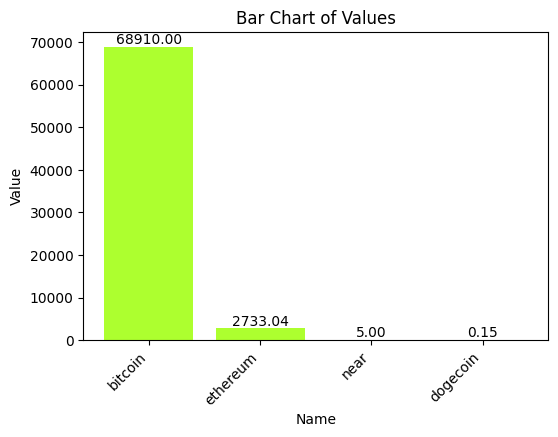

In [9]:
# Create bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(df['Name'], df['Value'], color='greenyellow')
plt.xlabel('Name')
plt.ylabel('Value')
plt.title('Bar Chart of Values')
plt.xticks(rotation=45, ha='right')

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, 
             yval + 0.05, f'{yval:.2f}', 
             ha='center', 
             va='bottom')
plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [ ]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')